In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
%matplotlib inline

C:\Users\rr00547872\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
r_cols = ['Class', 'Age','Gender', 'Steroid', 'Antivirals','Fatigue','Malaise','Anorexia','LiverBig','LiverFirm','SpleenPalpable','Spiders',
         'Ascites','Varices','Bilirubin','AlkPhosphate','SGOT','Albumin','Protime','Histology']
hepatitis_data = pd.read_csv('hepatitis.data', names=r_cols,sep=',',encoding='latin-1')

In [16]:
hepatitis_data.head()

,Class,Age,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [25]:
hepatitis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
Class             155 non-null int64
Age               155 non-null int64
Gender            155 non-null int64
Steroid           155 non-null float64
Antivirals        155 non-null int64
Fatigue           155 non-null float64
Malaise           155 non-null float64
Anorexia          155 non-null float64
LiverBig          155 non-null float64
LiverFirm         155 non-null float64
SpleenPalpable    155 non-null float64
Spiders           155 non-null float64
Ascites           155 non-null float64
Varices           155 non-null float64
Bilirubin         155 non-null float64
AlkPhosphate      155 non-null float64
SGOT              155 non-null float64
Albumin           155 non-null float64
Protime           155 non-null float64
Histology         155 non-null int64
dtypes: float64(15), int64(5)
memory usage: 24.3 KB


In [18]:
# replace ? with Nan values
hepatitis_data.replace('?',np.nan,inplace=True)

In [19]:
hepatitis_data.head(5)

,Class,Age,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,NaN,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,NaN,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,NaN,1
3,2,31,1,NaN,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,NaN,200,4.0,NaN,1


In [20]:
## remove columns that are 90% empty
thresh = len(hepatitis_data) * .1
hepatitis_data.dropna(thresh = thresh, axis = 1, inplace = True)

In [21]:
##Replace empty rows
def impute_median(series):
    return series.fillna(series.median())

hepatitis_data.Steroid=hepatitis_data['Steroid'].transform(impute_median)
hepatitis_data.Fatigue=hepatitis_data['Fatigue'].transform(impute_median)
hepatitis_data.Malaise=hepatitis_data['Malaise'].transform(impute_median)
hepatitis_data.Anorexia=hepatitis_data['Anorexia'].transform(impute_median)
hepatitis_data.LiverBig=hepatitis_data['LiverBig'].transform(impute_median)
hepatitis_data.LiverFirm=hepatitis_data['LiverFirm'].transform(impute_median)
hepatitis_data.SpleenPalpable=hepatitis_data['SpleenPalpable'].transform(impute_median)
hepatitis_data.Ascites=hepatitis_data['Ascites'].transform(impute_median)
hepatitis_data.Varices=hepatitis_data['Varices'].transform(impute_median)
hepatitis_data.Spiders=hepatitis_data['Spiders'].transform(impute_median)
hepatitis_data.Bilirubin=hepatitis_data['Bilirubin'].transform(impute_median)
hepatitis_data.SGOT=hepatitis_data['SGOT'].transform(impute_median)
by_class=hepatitis_data.groupby(['Class'])
hepatitis_data.AlkPhosphate=by_class['AlkPhosphate'].transform(impute_median)
by_bil_class=hepatitis_data.groupby(['Class'])
hepatitis_data.Albumin=by_bil_class['Albumin'].transform(impute_median)
hepatitis_data.Protime=by_bil_class['Protime'].transform(impute_median)

In [22]:
hepatitis_data.describe()
cols = hepatitis_data.columns[hepatitis_data.dtypes.eq('object')]
hepatitis_data[cols] = hepatitis_data[cols].apply(pd.to_numeric, errors='coerce')
#hepatitis_data = hepatitis_data.apply(pd.to_numeric, errors='coerce

In [23]:
# replace ? with Nan values
hepatitis_data [['Class', 'Gender', 'Steroid', 'Antivirals','Fatigue','Malaise','Anorexia','LiverBig','LiverFirm','SpleenPalpable','Spiders',
         'Ascites','Varices','Histology']]=hepatitis_data [['Class', 'Gender', 'Steroid', 'Antivirals','Fatigue','Malaise','Anorexia','LiverBig','LiverFirm','SpleenPalpable','Spiders',
         'Ascites','Varices','Histology']].apply(pd.Series.replace, to_replace=1, value=0)
hepatitis_data [['Class', 'Gender', 'Steroid', 'Antivirals','Fatigue','Malaise','Anorexia','LiverBig','LiverFirm','SpleenPalpable','Spiders',
         'Ascites','Varices','Histology']]=hepatitis_data [['Class', 'Gender', 'Steroid', 'Antivirals','Fatigue','Malaise','Anorexia','LiverBig','LiverFirm','SpleenPalpable','Spiders',
         'Ascites','Varices','Histology']].apply(pd.Series.replace, to_replace=2, value=1)


In [24]:
hepatitis_data

,Class,Age,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime,Histology
0,1,30,1,0.0,1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,85.0,18.0,4.0,66.0,0
1,1,50,0,0.0,1,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.9,135.0,42.0,3.5,66.0,0
2,1,78,0,1.0,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,96.0,32.0,4.0,66.0,0
3,1,31,0,1.0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,46.0,52.0,4.0,80.0,0
4,1,34,0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,85.0,200.0,4.0,66.0,0
5,1,34,0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,95.0,28.0,4.0,75.0,0
6,0,51,0,0.0,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,113.5,58.0,3.3,39.0,0
7,1,23,0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,85.0,58.0,4.0,66.0,0
8,1,39,0,1.0,1,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.7,85.0,48.0,4.4,66.0,0
9,1,30,0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,85.0,120.0,3.9,66.0,0


### Visualizations

In [90]:
def persontype_func(gender):
    if gender.item()==1:
        return 'Male'
    else:
        return 'Female' 
hepatitis_data['PersonType'] = hepatitis_data[['Gender']].apply(persontype_func, axis=1)

def survive_func(live):
    if live.item()==1:
        return 'Live'
    else:
        return 'Die' 
hepatitis_data['Survive_class'] = hepatitis_data[['Class']].apply(survive_func, axis=1)

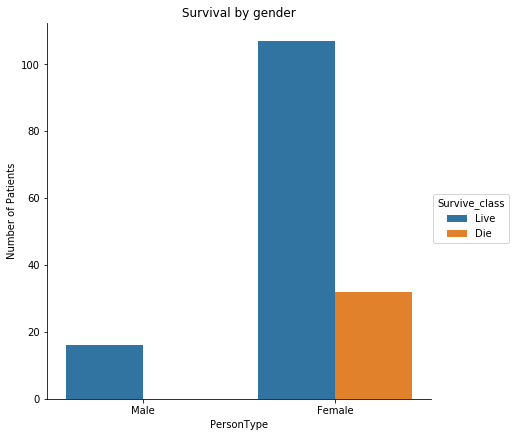

In [91]:
# How is survival affected by gender?

mx = sns.factorplot(x="PersonType", hue='Survive_class',data=hepatitis_data, kind="count", size=6)
mx.set(ylabel='Number of Patients')
plt.title('Survival by gender');
# According to the dataset survival rate for male is 0 whereas a woman is more likely to not survive

Text(0.5,1,'Boxplot of Chances to survive for each age coloured by Steroid ')

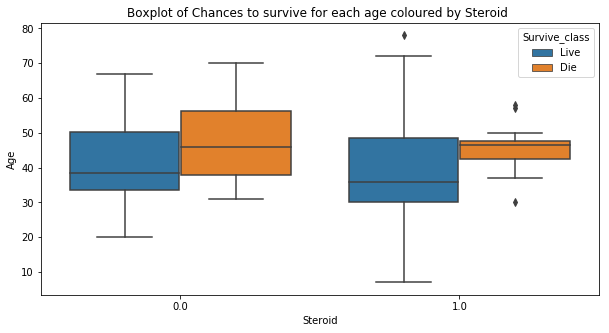

In [96]:
# Those who intake steroids are less likely to die with age
plt.figure(figsize=(10,5))
sns.boxplot('Steroid','Age', data=hepatitis_data, hue="Survive_class")
plt.title('Boxplot of Chances to survive for each age coloured by Steroid ')

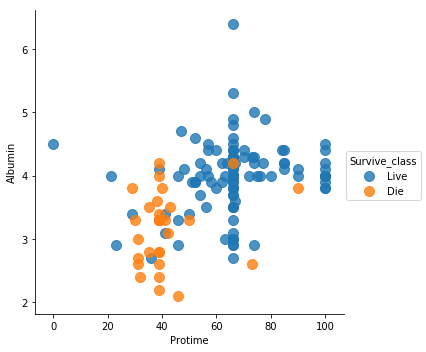

In [104]:
# Here Protime and Albumin is plot to understand its relationship to survival 
sns.lmplot('Protime', # Horizontal axis
           'Albumin', # Vertical axis
           data=hepatitis_data, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="Survive_class", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 100}) # S marker size

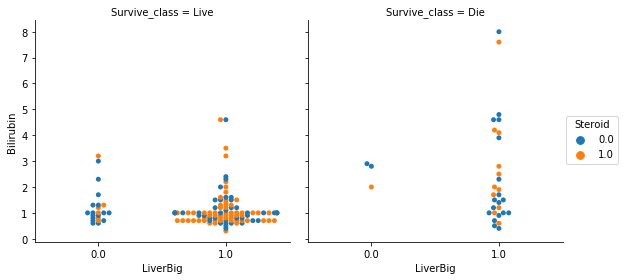

In [144]:
#If bilirubin is high and liver is big there are less chances of survival
g = sns.factorplot(x="LiverBig", y="Bilirubin",hue="Steroid", 
                   col="Survive_class",data=hepatitis_data, kind="swarm")

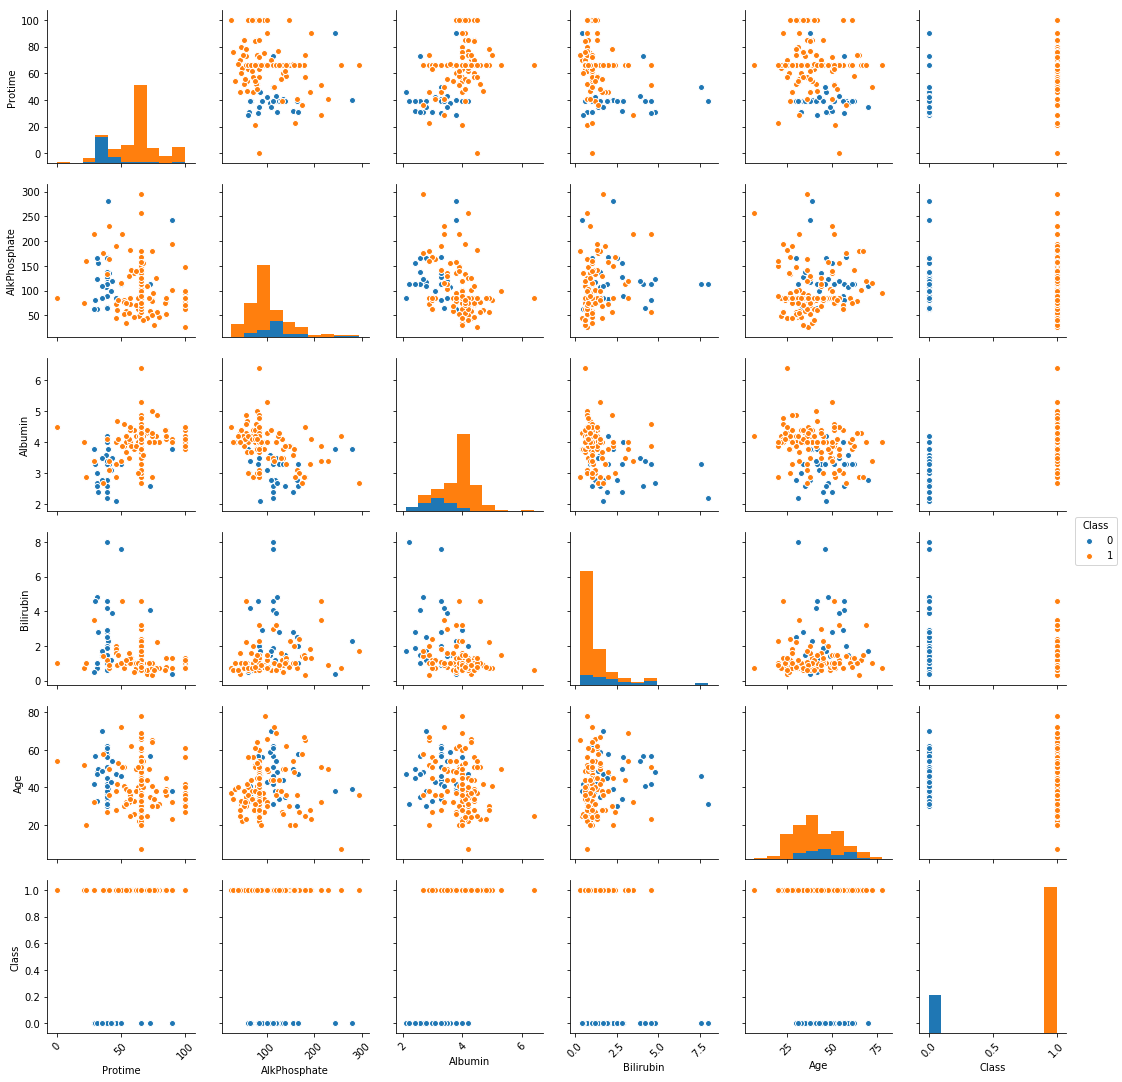

In [186]:
cols = ['Protime','AlkPhosphate', 'Albumin', 'Bilirubin','Age','Class']
g = sns.pairplot(hepatitis_data[cols], diag_kind="hist",hue='Class')
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)

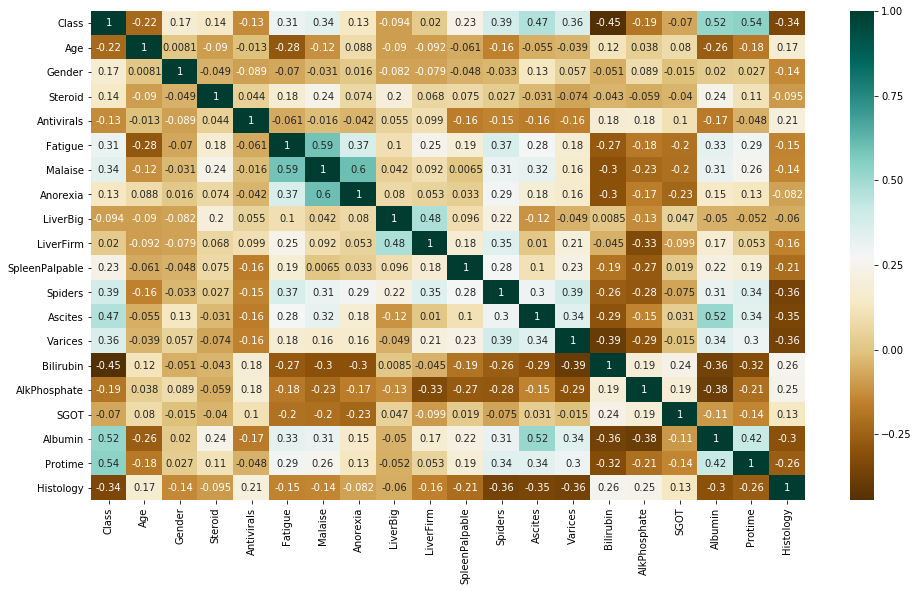

In [168]:
plt.figure(figsize=(16,9))
sns.heatmap(hepatitis_data.corr(),cmap="BrBG",annot=True)

In [ ]:
hepatitis_data.drop(['PersonType','Survive_class'],axis=1,inplace=True)

### Prepare the data

In [26]:
X = hepatitis_data.drop(['Class'],axis=1)

y = hepatitis_data.Class

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=23)

In [27]:
# train a logistic regression model on the training set

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)
# calculate accuracy with threshold of 0.5
print(metrics.accuracy_score(y_test, y_pred_class))

0.8461538461538461


In [29]:
# examine the class distribution of the testing set
y_test.value_counts()

1    32
0     7
Name: Class, dtype: int64

In [30]:
# calculate null accuracy 
y_test.value_counts().head(1) / len(y_test)

1    0.820513
Name: Class, dtype: float64

In [ ]:
# this shows that the original accuracy is very close to baseline accuracy due to an imbalance in classes

In [31]:
conf=metrics.confusion_matrix(y_test, y_pred_class)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[ 2  5]
 [ 1 31]]


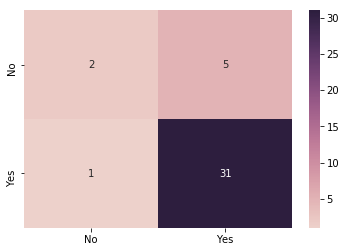

In [32]:
cmap = sns.cubehelix_palette(as_cmap=True)
sns.heatmap(conf,cmap = cmap,xticklabels=['No','Yes'],yticklabels=['No','Yes'],annot=True, fmt="d")

In [33]:
predict_probabilities = logreg.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_probabilities[:,1])

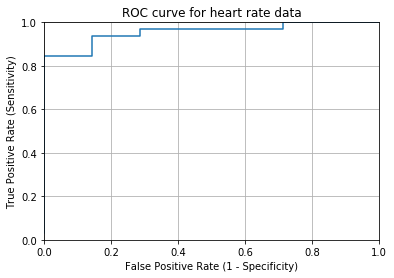

In [34]:
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for hepatitis data with imbalanced data')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [35]:
roc_auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.955357


In [36]:
# train a logistic regression model on the training set

logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

In [37]:
conf=metrics.confusion_matrix(y_test, y_pred_class)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[ 7  0]
 [ 2 30]]


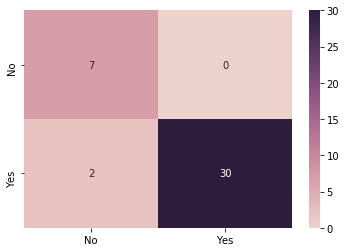

In [38]:
cmap = sns.cubehelix_palette(as_cmap=True)
sns.heatmap(conf,cmap = cmap,xticklabels=['No','Yes'],yticklabels=['No','Yes'],annot=True, fmt="d")

In [39]:
predict_probabilities = logreg.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_probabilities[:,1])

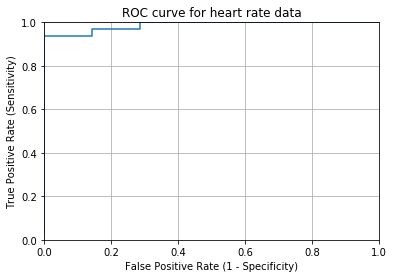

In [40]:
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for hepatitis data with balanced Logistic regression')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [41]:
roc_auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.986607


In [161]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [162]:
y_predict = knn.predict(X_test)

In [163]:
print(metrics.accuracy_score(y_test,y_predict))
conf=metrics.confusion_matrix(y_test, y_predict)
print(metrics.confusion_matrix(y_test, y_predict))

0.8974358974358975
[[ 4  3]
 [ 1 31]]


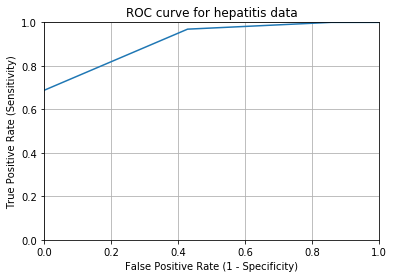

In [164]:
predict_probabilities = knn.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_probabilities[:,1])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for hepatitis data with KNN')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [165]:
roc_auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.919643
